# Analyzing Movie Reviews

The dataset is stored in the fandango_score_comparison.csv file. It contains information on how major movie review services rated movies. The data originally came from FiveThirtyEight.

In [31]:
import pandas as pd
movies = pd.read_csv("fandango_score_comparison.csv")
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


# Comparison between Fandango movie review scores and Metacritic

(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

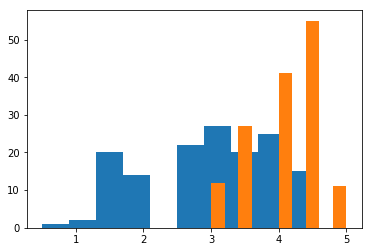

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(movies["Metacritic_norm_round"])
plt.hist(movies["Fandango_Stars"])

From this histogram, we can see Fandango has higher review scores than Metacritic, and narrower data range(3-5) than Metacritic(0-4.5). Fandango also sells movie tickets. This is why it has higher scores to attract more users to buy its tickets. 

In [33]:
movies["Fandango_Stars"].describe()

count    146.000000
mean       4.089041
std        0.540386
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [34]:
movies["Fandango_Stars"].median()

4.0

In [35]:
movies["Metacritic_norm_round"].describe()

count    146.000000
mean       2.972603
std        0.990961
min        0.500000
25%        2.125000
50%        3.000000
75%        4.000000
max        4.500000
Name: Metacritic_norm_round, dtype: float64

In [36]:
movies["Metacritic_norm_round"].median()

3.0

Mean of Fandango_Stars(4.08) is much higher then Metacritic_norm_round(2.97), which means that fandago has higher review scores than M, like I mentioned before. Becides, the standard deviation of Fandango(0.54) is lower than Metacritic(0.99), which means that scores range of Metacritic is broader than Fandango. Metacritic's scores are more fair than Fandango.

The median metacritic score appears higher than the mean because a few very low rates drag down the mean. The median fandango score is lower than the mean, because a few very high rates drag up the mean. 

# Fandango vs Metacritic Methodology

Fandango appears to inflate ratings and isn't transparent about how it calculates and aggregates ratings. Metacritic publishes how they compute scores in Q&A page, which is transparent.  

# Fandango and Metacritic correlation

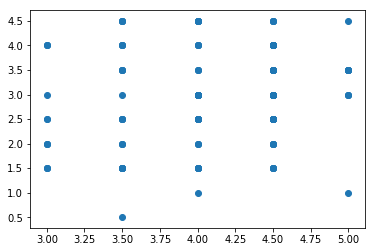

In [44]:
plt.scatter(movies["Fandango_Stars"],movies["Metacritic_norm_round"])

In [43]:
movies["fm_diff"] = abs(movies["Fandango_Stars"]-movies["Metacritic_norm_round"])
movies.sort_values("fm_diff", ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


This chart shows the top 5 moviews with the biggest differences btw F and M

In [52]:
from scipy.stats import pearsonr
rvalue, pvalue = pearsonr(movies["Fandango_Stars"],movies["Metacritic_norm_round"])
rvalue

0.17844919073895918

Correlation is fairly low. It indicates Fandango scores are not just inflated, they are fundamentally different.  It might inflate scores overall and also inflate scores differently depending on the movie. 

ps: The correlation coefficient is a measure that determines the degree to which two variables' movements are associated. -1 indicates a perfect negative correlation and 1 indicates a perfect positive correlation. 

# Using linear regression to do prediction

Create a linear regression with Metacritic_norm_round as the x-values and Fandango_Stars as the y-values.

In [69]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"],movies["Fandango_Stars"])

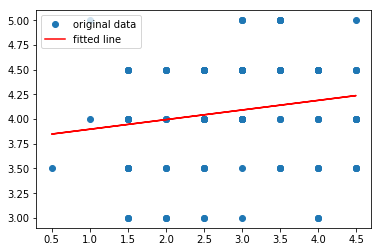

In [70]:
plt.plot(movies["Metacritic_norm_round"],movies["Fandango_Stars"],'o',label='original data')
plt.plot(movies["Metacritic_norm_round"], intercept + slope * movies["Metacritic_norm_round"], 'r', label='fitted line')
plt.legend()

In [71]:
pred_3 = 3 * slope + intercept
pred_3

4.0917071528212032

If Metacritic socre is 3, we predict Fandango score is 4.09.